### 1.1 Deutsch algorithm

We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is:

$$
f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$$

The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant. 

Note that the Deutsch-Jozsa problem is an $n$-bit extension of the single bit Deutsch problem. 

### 1.2 The Classical Solution

Classically, in the best case, two queries to the oracle can determine if the hidden Boolean function, $f(x)$, is balanced: 
e.g. if we get both $f(0,0,0,...)\rightarrow 0$ and $f(1,0,0,...) \rightarrow 1$, then we know the function is balanced as we have obtained the two different outputs.  

In the worst case, if we continue to see the same output for each input we try, we will have to check exactly half of all possible inputs plus one in order to be certain that $f(x)$ is constant. Since the total number of possible inputs is $2^n$, this implies that we need $2^{n-1}+1$ trial inputs to be certain that $f(x)$ is constant in the worst case. For example, for a $4$-bit string, if we checked $8$ out of the $16$ possible combinations, getting all $0$'s, it is still possible that the $9^\textrm{th}$ input returns a $1$ and $f(x)$ is balanced. Probabilistically, this is a very unlikely event. In fact, if we get the same result continually in succession, we can express the probability that the function is constant as a function of $k$ inputs as:



$$ P_\textrm{constant}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{for } 1 < k \leq 2^{n-1}$$



Realistically, we could opt to truncate our classical algorithm early, say if we were over x% confident. But if we want to be 100% confident, we would need to check $2^{n-1}+1$ inputs.

### Quantum Solution <a id='quantum-solution'> </a>

Using a quantum computer, we can solve this problem with 100% confidence after only one call to the function $f(x)$, provided we have the function $f$ implemented as a quantum oracle, which maps the state $\vert x\rangle \vert y\rangle $ to $ \vert x\rangle \vert y \oplus f(x)\rangle$, where $\oplus$ is addition modulo $2$. Below is the generic circuit for the Deutsch-Jozsa algorithm.

Now, let's go through the steps of the algorithm:

<ol>
   <li>
        Prepare two quantum registers. The first is an $n$-qubit register initialized to $|0\rangle$, and the second is a one-qubit register initialized to $|1\rangle$:
        

$$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle$$


   </li>
    
   <li>
        Apply a Hadamard gate to each qubit:
        

$$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$$


   </li>
   
   <li>
        Apply the quantum oracle $\vert x\rangle \vert y\rangle$ to $\vert x\rangle \vert y \oplus f(x)\rangle$:
        $$
            \begin{aligned}
            \lvert \psi_2 \rangle  
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \\  
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle ) 
        \end{aligned}
        $$
       
since for each $x,f(x)$ is either $0$ or $1$.
   </li>

   <li>
       At this point the second single qubit register may be ignored. Apply a Hadamard gate to each qubit in the first register:
        $$
        \begin{aligned}
            \lvert \psi_3 \rangle 
                & = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
                    \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y} 
                    \vert y \rangle \right] \\
                & = \frac{1}{2^n}\sum_{y=0}^{2^n-1}
                    \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)}(-1)^{x \cdot y} \right]
                    \vert y \rangle
        \end{aligned}
        $$
       
where $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ is the sum of the bitwise product.
   </li>

   <li>
       Measure the first register. Notice that the probability of measuring $\vert 0 \rangle ^{\otimes n} = \lvert \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \rvert^2$, which evaluates to $1$ if $f(x)$ is constant and $0$ if $f(x)$ is balanced. 
   </li>

</ol>


## Deutsch algorithm implementation for 2 qubit 

This is a specific example for a two bit balanced function: 

Consider a two-bit function $f(x_0,x_1)=x_0 \oplus x_1$ such that 

$f(0,0)=0$

$f(0,1)=1$

$f(1,0)=1$

$f(1,1)=0$

The corresponding phase oracle of this two-bit oracle is $U_f \lvert x_1, x_0 \rangle = (-1)^{f(x_1, x_0)}\lvert x \rangle$

We will now check if this oracle works as expected by taking a example state
$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

<ol>
    <li> The first register of two qubits is initialized to $|00\rangle$ and the second register qubit to $|1\rangle$ 
        
(Note that we are using subscripts 0, 1, and 2 to index the qubits. A subscript of "01" indicates the state of the register containing qubits 0 and 1)
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

 
   </li>
    
   <li> Apply Hadamard on all qubits
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  $$

 
   </li>
    
   <li> The oracle function can be implemented as $\text{Q}_f = CX_{02}CX_{12}$, 
          $$
       \begin{align*}
            \lvert \psi_2 \rangle =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 0 \rangle - \lvert 1 \oplus 0 \oplus 0 \rangle \right)_{2} \\
                  + \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 1 \rangle - \lvert 1 \oplus 0 \oplus 1 \rangle \right)_{2} \\
                  + \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 1 \oplus 0 \rangle - \lvert 1 \oplus 1 \oplus 0 \rangle \right)_{2} \\
                  + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \oplus 1 \oplus 1 \rangle - \lvert 1 \oplus 1 \oplus 1 \rangle \right)_{2} \right]
        \end{align*}
         $$
   </li>
    
   <li>Simplifying this, we get the following: 
       $$
       \begin{aligned}
        \lvert \psi_2 \rangle & = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} - \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert  1 \rangle \right)_{2} - \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0  \rangle - \lvert 1 \rangle \right)_{2} + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  \right] \\
        & = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} \\
        & = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{0} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{1} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}
        \end{aligned}
        $$
   </li>
    
   <li> Apply Hadamard on the first register
        

$$ \lvert \psi_3\rangle = \lvert 1 \rangle_{0} \otimes \lvert 1 \rangle_{1} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} $$


   </li>
   
   <li> Measuring the first two qubits will give the non-zero $11$, indicating a balanced function.
   </li>
</ol>

## 4. Qiskit Implementation 

We now implement the Deutsch-Jozsa algorithm for the example of a two-bit function, with both constant and balanced oracles. First let's do our imports:

In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
from scipy.linalg import expm

import matplotlib.pyplot as plt

### Constant oracle

In [7]:
# set the length of the n-bit input string. 
n = 2

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘

### Balanced oracle

In [8]:
balanced_oracle = QuantumCircuit(n+1)

Next, we create a balanced oracle. As we saw in section 1b, we can create a balanced oracle by performing CNOTs with each input qubit as a control and the output bit as the target. We can vary the input states that give 0 or 1 by wrapping some of the controls in X-gates. Let's first choose a binary string of length `n` that dictates which controls to wrap:

In [9]:
b_str = "10"

In [10]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "10"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────

Next, we do our controlled-NOT gates, using each input qubit as a control, and the output qubit as a target:

In [11]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()

┌───┐ ░            ░ 
q_0: ┤ X ├─░───■────────░─
     └───┘ ░   │        ░ 
q_1: ──────░───┼────■───░─
     ┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ 
q_2: ┤ X ├─░─┤ X ├┤ X ├─░─
     └───┘ ░ └───┘└───┘ ░

Finally, we repeat the code from two cells up to finish wrapping the controls in X-gates:

In [12]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "10"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░            ░ ┌───┐
q_0: ┤ X ├─░───■────────░─┤ X ├
     └───┘ ░   │        ░ └───┘
q_1: ──────░───┼────■───░──────
           ░ ┌─┴─┐┌─┴─┐ ░      
q_2: ──────░─┤ X ├┤ X ├─░──────
           ░ └───┘└───┘ ░

We have just created a balanced oracle! All that's left to do is see if the Deutsch algorithm can solve it.

### 4.3 The Full Algorithm

Let's now put everything together. This first step in the algorithm is to initialize the input qubits in the state $|{+}\rangle$ and the output qubit in the state $|{-}\rangle$:

In [13]:
deustch_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
deustch_circuit.x(n)
deustch_circuit.h(n)
deustch_circuit.draw()

NameError: name 'dj_circuit' is not defined

Next, let's apply the oracle. Here we apply the `balanced_oracle` we created above:

In [14]:
deustch_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    deustch_circuit.h(qubit)

# Put qubit in state |->
deustch_circuit.x(n)
deustch_circuit.h(n)

# Add oracle
deustch_circuit = deustch_circuit.compose(balanced_oracle)
deustch_circuit.draw()

┌───┐┌───┐ ░            ░ ┌───┐
q_0: ┤ H ├┤ X ├─░───■────────░─┤ X ├
     ├───┤└───┘ ░   │        ░ └───┘
q_1: ┤ H ├──────░───┼────■───░──────
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░      
q_2: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░──────
     └───┘└───┘ ░ └───┘└───┘ ░      
c: 2/═══════════════════════════════

In [15]:
deustch_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    deustch_circuit.h(qubit)

# Put qubit in state |->
deustch_circuit.x(n)
deustch_circuit.h(n)

# Add oracle
deustch_circuit = deustch_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    deustch_circuit.h(qubit)
deustch_circuit.barrier()

# Measure
for i in range(n):
    deustch_circuit.measure(i, i)

# Display circuit
deustch_circuit.draw()

┌───┐┌───┐ ░            ░ ┌───┐┌───┐ ░ ┌─┐   
q_0: ┤ H ├┤ X ├─░───■────────░─┤ X ├┤ H ├─░─┤M├───
     ├───┤└───┘ ░   │        ░ ├───┤└───┘ ░ └╥┘┌─┐
q_1: ┤ H ├──────░───┼────■───░─┤ H ├──────░──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘      ░  ║ └╥┘
q_2: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░────────────░──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░            ░  ║  ║ 
c: 2/════════════════════════════════════════╩══╩═
                                             0  1

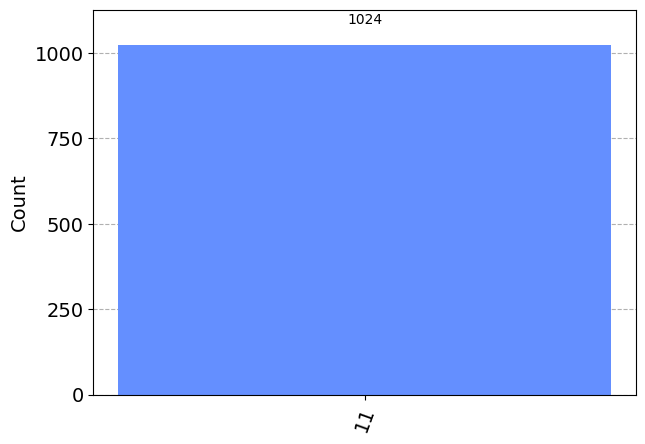

In [16]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(deustch_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

We can see from the results above that we have a 0% chance of measuring `00`. This correctly predicts the function is balanced. 


### Generalised Circuits

Below, we provide a generalised function that creates Deutsch oracles and turns them into quantum gates. It takes the `case`, (either `'balanced'` or '`constant`', and `n`, the size of the input register:
For us n = 2

In [17]:
def deutsch_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [18]:
def deutsch_algorithm(oracle, n):
    deutsch_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    deutsch_circuit.x(n)
    deutsch_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        deutsch_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    deutsch_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        deutsch_circuit.h(qubit)
    
    for i in range(n):
        deutsch_circuit.measure(i, i)
    
    return deutsch_circuit

Finally, let's use these functions to implement 2 qubits with the algorithm:

In [19]:
n = 2
oracle_gate = deutsch_oracle('balanced', n)
d_2qubits_circuit = deutsch_algorithm(oracle_gate, n)
d_2qubits_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐   
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├───
     ├───┤     │         │├───┤└╥┘┌─┐
q_1: ┤ H ├─────┤1 Oracle ├┤ H ├─╫─┤M├
     ├───┤┌───┐│         │└───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├┤2        ├──────╫──╫─
     └───┘└───┘└─────────┘      ║  ║ 
c: 2/═══════════════════════════╩══╩═
                                0  1

See the results of this circuit

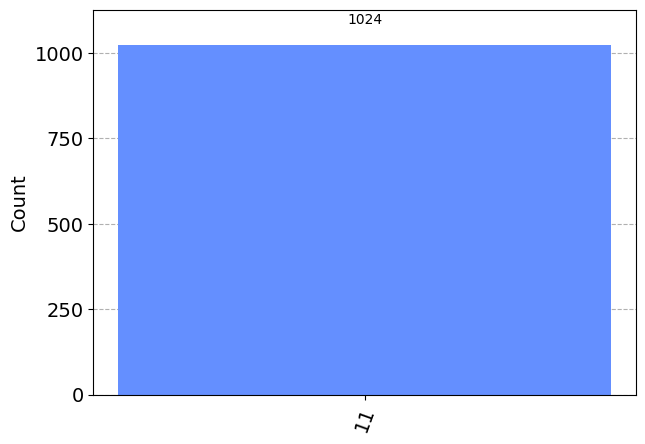

In [20]:
transpiled_deustsch_circuit = transpile(d_2qubits_circuit, aer_sim)
qob = assemble(transpiled_deustsch_circuit)
results = aer_sim.run(qob).result()
answer = results.get_counts()
plot_histogram(answer)